In [1]:
# Step 1: Importing Required Libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Step 2: Import Required Dataset
suv_data=pd.read_csv("datasets/suv_data.csv")

In [3]:
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
# Step 2: (Cont.) Extracting required data from the imported dataset
final_salary_data = pd.DataFrame(columns=['Salary'])
final_salary_data['Salary'] = pd.DataFrame(suv_data['EstimatedSalary'])

In [5]:
final_salary_data.describe

<bound method NDFrame.describe of      Salary
0     19000
1     20000
2     43000
3     57000
4     76000
..      ...
395   41000
396   23000
397   20000
398   33000
399   36000

[400 rows x 1 columns]>

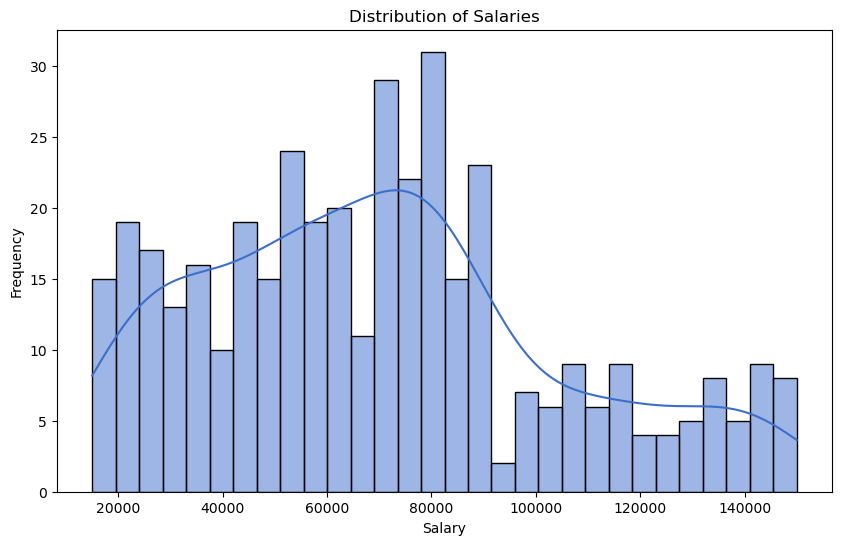

In [6]:
# Step 3: Viaualizing the final data
# Visualize the generated data using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(final_salary_data['Salary'], bins=30, color='#3c6ecc', kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## How to Select the Value of k
The optimal number of clusters (`k`) can be determined using methods like:
1. **Elbow Method:**
- Plot the inertia (sum of squared distances between points and their cluster centers) for different values of `k`.
- Look for the "elbow" point where inertia decreases significantly.

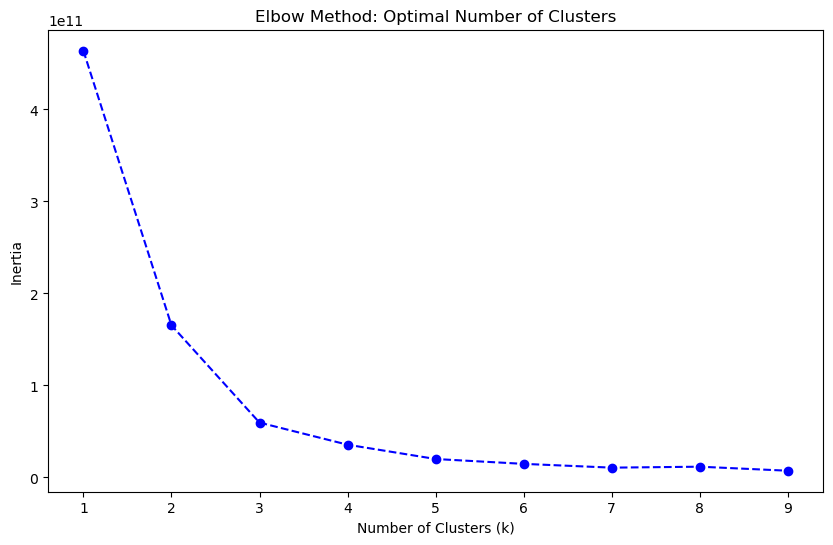

In [7]:
# Step 4: Determining the optimal value of K. 
# Method a.): Using Elbow Method to determine optimal k
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_salary_data[['Salary']])
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

*Using Elbow Method:*
- The graph shows that the inertia decreases significantly up to k = 3, after which the rate of decrease slows down.
- This suggests that k = 3 might be a good choice based on the Elbow Method.

2. **Silhouette Score:**
- Measures how well-separated the clusters are.
- Higher silhouette scores indicate better-defined clusters.

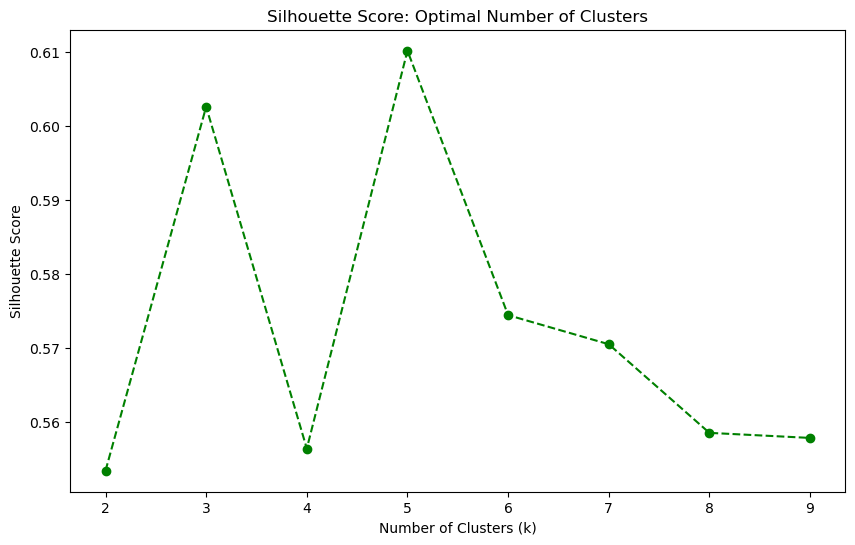

In [8]:
# Step 4:(Cont.) Determining the optimal value of K. 
# Method b.): Using Silhouette Score to determine optimal k
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # Silhouette score requires at least two clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(final_salary_data[['Salary']])
    silhouette_scores.append(silhouette_score(final_salary_data[['Salary']], labels))

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

*Using Silhouette Score:* 
- The graph indicates that the highest silhouette score is approximately 0.61 at k = 5.
- The silhouette score measures how similar an object is to its own cluster compared to other clusters.
- A higher score indicates better-defined clusters.

### *Finalizing `K` Value*
- By using both methods, we can cross-validate our findings and make a more informed decision. 
- In this case, the *Elbow Method* suggests `k = 3`, while the *Silhouette Score* suggests `k = 5`.
- we can consider the context and requirements of your analysis to choose the most suitable k value.
- Combining insights from both methods often leads to a more robust clustering solution.
- Considering both methods, **`k = 5`** seems to be the optimal number of clusters for our dataset, as it provides the highest silhouette score, indicating well-defined clusters.
- However, if you prioritize the simplicity of fewer clusters, `k = 3` is also a reasonable choice based on the Elbow Method.

In [9]:
# Step 5: Applying K-Means Clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
final_salary_data['Cluster'] = kmeans.fit_predict(final_salary_data[['Salary']])

In [10]:
final_salary_data

,Salary,Cluster
0,19000,1
1,20000,1
2,43000,3
3,57000,3
4,76000,0
...,...,...
395,41000,3
396,23000,1
397,20000,1
398,33000,1


In [11]:
# Step 6: Sorting Clusters 
centroids = kmeans.cluster_centers_
sorted_indices = np.argsort(centroids.flatten())

# Map original cluster labels to sorted order
final_salary_data['SortedCluster'] = final_salary_data['Cluster'].map(lambda x: np.where(sorted_indices == x)[0][0])

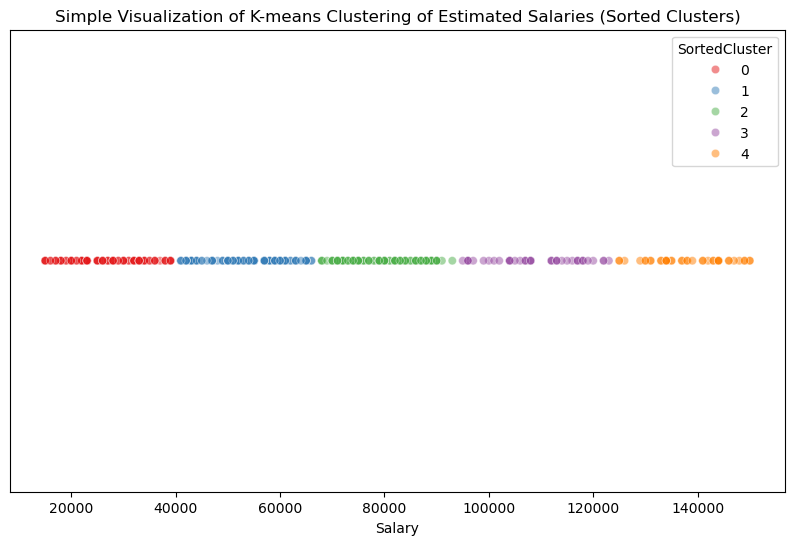

In [12]:
# Step 7: Visualizing the formed clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y=np.zeros_like(final_salary_data['Salary']), hue='SortedCluster', data=final_salary_data, palette='Set1', alpha=0.5)
plt.yticks([])
plt.title('Simple Visualization of K-means Clustering of Estimated Salaries (Sorted Clusters)')
plt.show()

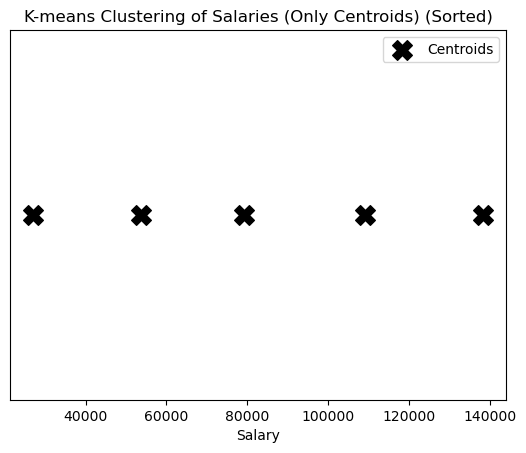

In [13]:
# Step 7: (Cont.) Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids, np.zeros_like(centroids), color='black', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Salaries (Only Centroids) (Sorted)')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here
plt.legend()
plt.show()

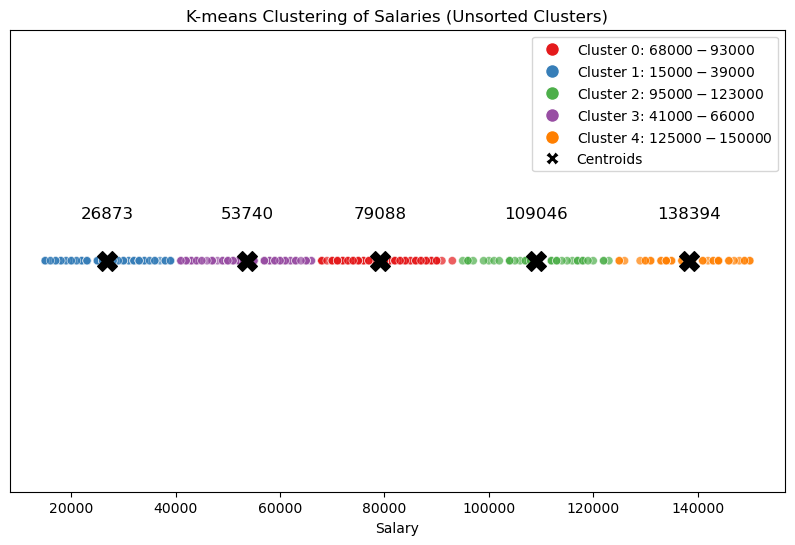

In [14]:
# Step 7: (Cont.) Visualize the clusters and centroid with range of each cluster
# Calculate min and max salary for each sorted cluster for legend
cluster_ranges = []
for i in range(k):
    min_salary = final_salary_data[final_salary_data['Cluster'] == i]['Salary'].min()
    max_salary = final_salary_data[final_salary_data['Cluster'] == i]['Salary'].max()
    cluster_ranges.append(f'Cluster {i}: ${min_salary} - ${max_salary}')

# Visualize the Values of Centroids of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y=[0] * len(final_salary_data), hue='Cluster', data=final_salary_data,
                palette='Set1', alpha=0.7)

# Plot centroids in sorted order
sorted_centroids = centroids[sorted_indices]
plt.scatter(sorted_centroids[:, 0], [0] * len(sorted_centroids), color='black', marker='X', s=200, label='Centroids')

# Annotate centroids with their values
for i in range(len(sorted_centroids)):
    plt.text(sorted_centroids[i][0], 0.01, f'{int(sorted_centroids[i][0])}', 
             horizontalalignment='center', color='black', fontsize=12)

plt.title('K-means Clustering of Salaries (Unsorted Clusters)')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here

# Create custom legend handles for cluster ranges
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cluster_ranges[i],
                       markerfacecolor=sns.color_palette('Set1')[i], markersize=10) for i in range(k)]
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='X', color='w', label='Centroids',
                                           markerfacecolor='black', markersize=10)], loc='upper right')

plt.show()

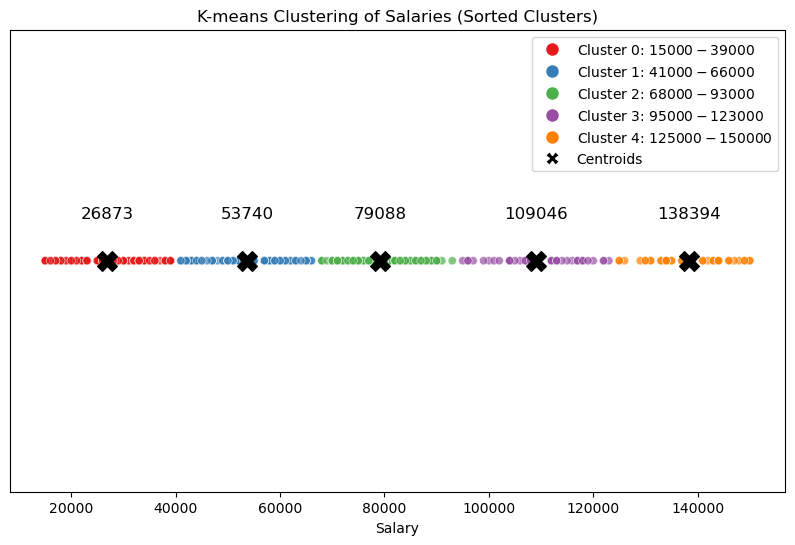

In [15]:
# Step 7: (Cont.) Visualize the clusters and centroid with range of each cluster
# Calculate min and max salary for each cluster for legend
cluster_ranges = []
for i in range(k):
    min_salary = final_salary_data[final_salary_data['SortedCluster'] == i]['Salary'].min()
    max_salary = final_salary_data[final_salary_data['SortedCluster'] == i]['Salary'].max()
    cluster_ranges.append(f'Cluster {i}: ${min_salary} - ${max_salary}')

# Step 6: Visualize the Values of Centroids of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y=[0] * len(final_salary_data), hue='SortedCluster', data=final_salary_data,
                palette='Set1', alpha=0.7)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], [0] * len(centroids), color='black', marker='X', s=200, label='Centroids')

# Annotate centroids with their values
for i in range(len(centroids)):
    plt.text(centroids[i][0], 0.01, f'{int(centroids[i][0])}', 
             horizontalalignment='center', color='black', fontsize=12)

plt.title('K-means Clustering of Salaries (Sorted Clusters)')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here

# Create custom legend handles for cluster ranges
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cluster_ranges[i],
                       markerfacecolor=sns.color_palette('Set1')[i], markersize=10) for i in range(k)]
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='X', color='w', label='Centroids',
                                           markerfacecolor='black', markersize=10)], loc='upper right')

plt.show()

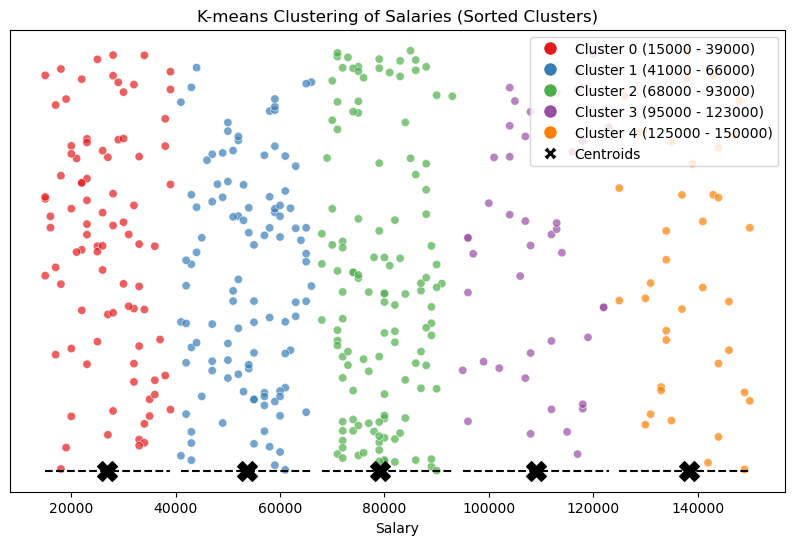

In [16]:
# Step 7: (Cont.) Visualize the clusters with proper scatter layout
plt.figure(figsize=(10, 6))

# Add some jitter to the y-axis for better visualization
jitter_strength = 0.02
sns.scatterplot(x='Salary', y=np.random.rand(len(final_salary_data)) * jitter_strength,
                hue='SortedCluster', data=final_salary_data,
                palette='Set1', alpha=0.7)

# Plot centroids in sorted order
sorted_centroids = centroids[sorted_indices]
plt.scatter(sorted_centroids[:, 0], [0] * len(sorted_centroids), color='black', marker='X', s=200)

# Add bounding lines around each cluster and prepare legend labels
legend_labels = []
for i in range(k):
    cluster_points = final_salary_data[final_salary_data['SortedCluster'] == i]['Salary']
    plt.plot([cluster_points.min(), cluster_points.max()], [0, 0], color='black', linestyle='--')
    legend_labels.append(f'Cluster {i} ({cluster_points.min()} - {cluster_points.max()})')

# Add centroids to legend manually
legend_labels.append('Centroids')

# Create custom legend handles for clusters and centroids
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                       markerfacecolor=sns.color_palette('Set1')[i], markersize=10) for i in range(k)]
handles.append(plt.Line2D([0], [0], marker='X', color='w', label='Centroids',
                            markerfacecolor='black', markersize=10))

# Add the legend to the plot at the top right corner
plt.legend(handles=handles, loc='upper right')

plt.title('K-means Clustering of Salaries (Sorted Clusters)')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here
plt.show()

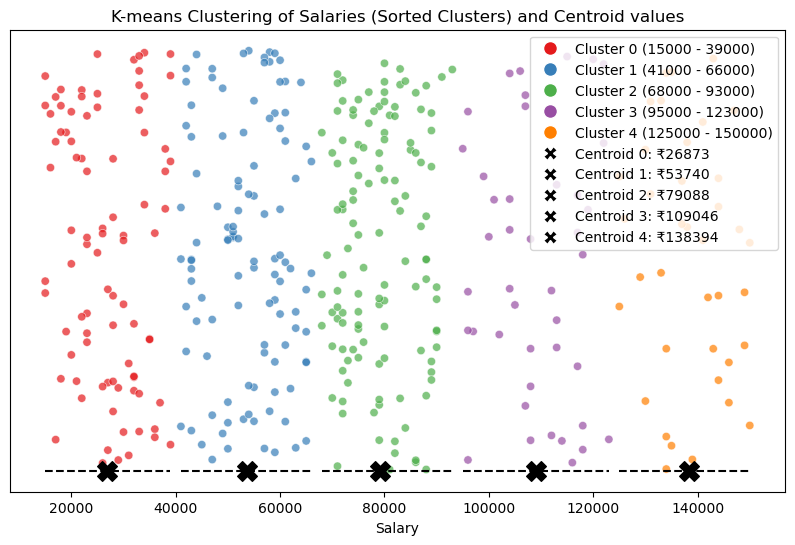

In [17]:
# Step 7: (Cont.) Visualize the clusters and centroid with cluster range and centroid value
# Step to visualize clusters with sorted legend
plt.figure(figsize=(10, 6))

# Add some jitter to the y-axis for better visualization
jitter_strength = 0.02
sns.scatterplot(x='Salary', y=np.random.rand(len(final_salary_data)) * jitter_strength,
                hue='SortedCluster', data=final_salary_data,
                palette='Set1', alpha=0.7)

# Plot centroids in sorted order
sorted_centroids = centroids[sorted_indices]
plt.scatter(sorted_centroids[:, 0], [0] * len(sorted_centroids), color='black', marker='X', s=200)

# Add bounding lines around each cluster and prepare legend labels
legend_labels = []
for i in range(k):
    cluster_points = final_salary_data[final_salary_data['SortedCluster'] == i]['Salary']
    plt.plot([cluster_points.min(), cluster_points.max()], [0, 0], color='black', linestyle='--')
    legend_labels.append(f'Cluster {i} ({cluster_points.min()} - {cluster_points.max()})')

# Add centroid values to legend labels
for i in range(k):
    legend_labels.append(f'Centroid {i}: ₹{int(sorted_centroids[i][0])}')

# Create custom legend handles for clusters and centroids
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                       markerfacecolor=sns.color_palette('Set1')[i], markersize=10) for i in range(k)]
handles += [plt.Line2D([0], [0], marker='X', color='w', label=legend_labels[k + i],
                        markerfacecolor='black', markersize=10) for i in range(k)]

# Add the legend to the plot at the top right corner
plt.legend(handles=handles, loc='upper right')

plt.title('K-means Clustering of Salaries (Sorted Clusters) and Centroid values')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here
plt.show()

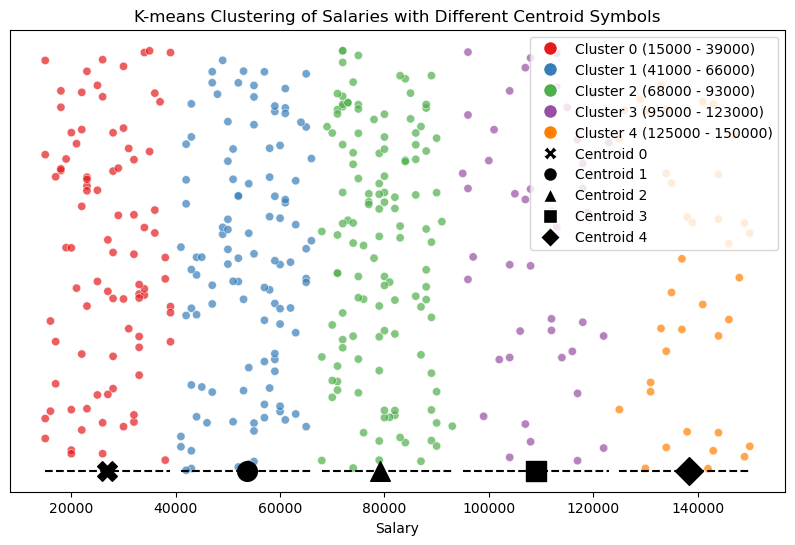

In [18]:
# Step 7: (Cont.) Visualize the clusters and centroid (with different symbols for different centroids) with cluster range
# Step to visualize clusters with sorted legend
plt.figure(figsize=(10, 6))

# Add some jitter to the y-axis for better visualization
jitter_strength = 0.02
sns.scatterplot(x='Salary', y=np.random.rand(len(final_salary_data)) * jitter_strength,
                hue='SortedCluster', data=final_salary_data,
                palette='Set1', alpha=0.7)

# Define different markers for centroids
centroid_markers = ['X', 'o', '^', 's', 'D']  # Different markers for each centroid

# Plot centroids in sorted order with different symbols
for i in range(k):
    plt.scatter(sorted_centroids[i], [0], color='black', marker=centroid_markers[i], s=200,
                label=f'Centroid {i}: ₹{int(sorted_centroids[i][0])}')

# Add bounding lines around each cluster and prepare legend labels
legend_labels = []
for i in range(k):
    cluster_points = final_salary_data[final_salary_data['SortedCluster'] == i]['Salary']
    plt.plot([cluster_points.min(), cluster_points.max()], [0, 0], color='black', linestyle='--')
    legend_labels.append(f'Cluster {i} ({cluster_points.min()} - {cluster_points.max()})')

# Create custom legend handles for clusters and centroids
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                       markerfacecolor=sns.color_palette('Set1')[i], markersize=10) for i in range(k)]

# Add centroids to the legend manually (already included in scatter)
handles += [plt.Line2D([0], [0], marker=centroid_markers[i], color='w', label=f'Centroid {i}',
                        markerfacecolor='black', markersize=10) for i in range(k)]

# Add the legend to the plot at the top right corner
plt.legend(handles=handles, loc='upper right')

plt.title('K-means Clustering of Salaries with Different Centroid Symbols')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here
plt.show()

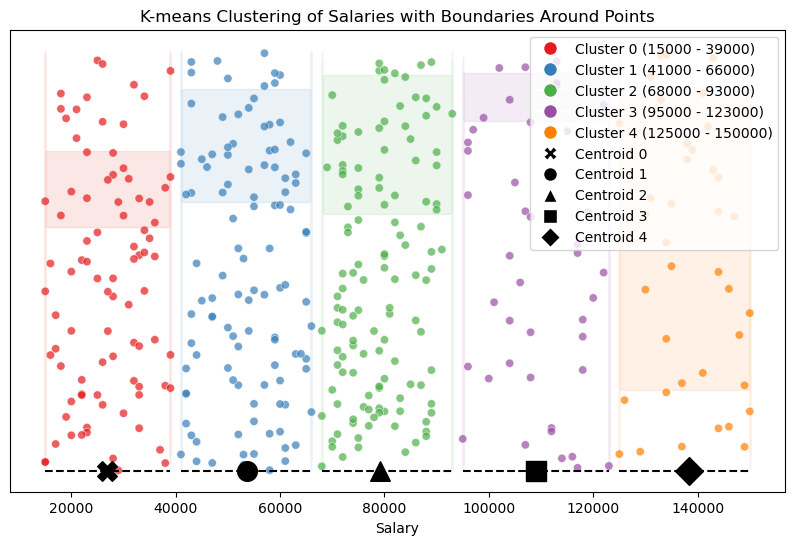

In [19]:
# Step 7: (Cont.) Visualize the clusters and centroid (with different symbols for different centroids) with cluster range and boundaries around point
# Step to visualize clusters with sorted legend
plt.figure(figsize=(10, 6))

# Add some jitter to the y-axis for better visualization
jitter_strength = 0.02
sns.scatterplot(x='Salary', y=np.random.rand(len(final_salary_data)) * jitter_strength,
                hue='SortedCluster', data=final_salary_data,
                palette='Set1', alpha=0.7)

# Define different markers for centroids
centroid_markers = ['X', 'o', '^', 's', 'D']  # Different markers for each centroid

# Plot centroids in sorted order with different symbols
for i in range(k):
    plt.scatter(sorted_centroids[i], [0], color='black', marker=centroid_markers[i], s=200,
                label=f'Centroid {i}: ${int(sorted_centroids[i][0])}')

# Add bounding lines around each cluster and prepare legend labels
legend_labels = []
for i in range(k):
    cluster_points = final_salary_data[final_salary_data['SortedCluster'] == i]['Salary']
    plt.plot([cluster_points.min(), cluster_points.max()], [0, 0], color='black', linestyle='--')
    legend_labels.append(f'Cluster {i} ({cluster_points.min()} - {cluster_points.max()})')

    # Draw boundaries around the points in the cluster
    cluster_y_values = np.random.rand(len(cluster_points)) * jitter_strength
    plt.fill_betweenx(cluster_y_values, cluster_points.min(), cluster_points.max(), 
                       color=sns.color_palette('Set1')[i], alpha=0.1)

# Create custom legend handles for clusters and centroids
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                       markerfacecolor=sns.color_palette('Set1')[i], markersize=10) for i in range(k)]

# Add centroids to the legend manually (already included in scatter)
handles += [plt.Line2D([0], [0], marker=centroid_markers[i], color='w', label=f'Centroid {i}',
                        markerfacecolor='black', markersize=10) for i in range(k)]

# Add the legend to the plot at the top right corner
plt.legend(handles=handles, loc='upper right')

plt.title('K-means Clustering of Salaries with Boundaries Around Points')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here
plt.show()

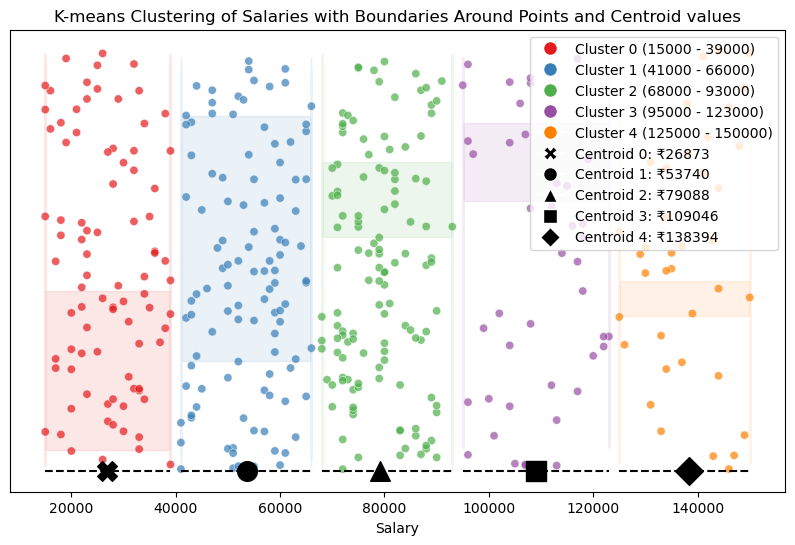

In [20]:
# Step 7: (Cont.) Visualize the clusters and centroid (with different symbols for different centroids) with cluster range and centroid values and boundaries around point
# Step to visualize clusters with sorted legend
plt.figure(figsize=(10, 6))

# Add some jitter to the y-axis for better visualization
jitter_strength = 0.02
sns.scatterplot(x='Salary', y=np.random.rand(len(final_salary_data)) * jitter_strength,
                hue='SortedCluster', data=final_salary_data,
                palette='Set1', alpha=0.7)

# Define different markers for centroids
centroid_markers = ['X', 'o', '^', 's', 'D']  # Different markers for each centroid

# Plot centroids in sorted order with different symbols and add their values to the plot
for i in range(k):
    plt.scatter(centroids[sorted_indices[i]], [0], color='black', marker=centroid_markers[i], s=200,
                label=f'Centroid {i}: ₹{int(centroids[sorted_indices[i]][0])}')

# Add bounding lines around each cluster and prepare legend labels
legend_labels = []
for i in range(k):
    cluster_points = final_salary_data[final_salary_data['SortedCluster'] == i]['Salary']
    plt.plot([cluster_points.min(), cluster_points.max()], [0, 0], color='black', linestyle='--')
    legend_labels.append(f'Cluster {i} ({cluster_points.min()} - {cluster_points.max()})')

    # Draw boundaries around the points in the cluster
    cluster_y_values = np.random.rand(len(cluster_points)) * jitter_strength
    plt.fill_betweenx(cluster_y_values, cluster_points.min(), cluster_points.max(), 
                       color=sns.color_palette('Set1')[i], alpha=0.1)

# Create custom legend handles for clusters and centroids
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                       markerfacecolor=sns.color_palette('Set1')[i], markersize=10) for i in range(k)]

# Add centroids to the legend manually (already included in scatter)
handles += [plt.Line2D([0], [0], marker=centroid_markers[i], color='w', label=f'Centroid {i}: ₹{int(centroids[sorted_indices[i]][0])}',
                        markerfacecolor='black', markersize=10) for i in range(k)]

# Add the legend to the plot at the top right corner
plt.legend(handles=handles, loc='upper right')

plt.title('K-means Clustering of Salaries with Boundaries Around Points and Centroid values')
plt.xlabel('Salary')
plt.yticks([])  # Hide y-axis ticks since they are not informative here
plt.show()